# Reading images
## What is Tensor:

- In Maths , one dimensional array is vector and two dimensional array is matrx.
- Tensor is array with any number of dimensions called ranks.
- A Matrxi with 12 rows and 18 colums = shape = (12,18) and rank 2.
- Use numpy to create n-dimensional arrays.
- Example:
    ```
    x = np.array([2.0, 3.0, 1.0, 0.0])  ## 1 D array
    x5d = np.zeros(shape=(4,3,7,8,3))
    ```

In [11]:
import numpy as np
x = np.array([2.0, 3.0, 1.0, 0.0])
x.shape

(4,)

In [13]:
### Create 5D Array of zeros
x5d = np.zeros(shape=(4,3,7,8,3))
print(x5d.shape)
print(x5d.ndim)
print(x5d.size)  ## Total number of elements
print(x5d.dtype) ## Data type of elements
print(x5d.itemsize) ## Size of each element in bytes
print(x5d.nbytes)  ## Total size in bytes (size * itemsize)

(4, 3, 7, 8, 3)
5
2016
float64
8
16128


In [23]:
### To obtain hardware acceleration with TensorFlow, we need to install the tensorflow package.
#!pip install tensorflow
import tensorflow as tf
tx = tf.convert_to_tensor(x, dtype=tf.float32)
tx.shape

TensorShape([4])

In [24]:
## To convert tensor back to numpy array
nx = tx.numpy()
nx

### Numpy array is done on the CPU,
### while TensorFlow can utilize GPU/TPU for acceleration.

array([2., 3., 1., 0.], dtype=float32)

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
import tensorflow as tf 
def read_and_decode(filename, reshape_dims):
    ## img is tensor that contains an array of bytes.
    img = tf.io.read_file(filename)
    ### Decoding - Covert image to 3D uint8 tensor 
    ### 3 color channels - red,green and blue from JPEG image.
    ### Gray scale may have only one channel.
    ### The pixels consist of RGB values of type unit8
    ### unit8  = unsigned - no -ve, int integer 8 bits  (0 to 255)
    img = tf.image.decode_jpeg(img, channels=3)
    ### Covert 3D int8 to floats in the [0,1] range. 
    ### coz - ML does better with small numbers.    
    img = tf.image.convert_image_dtype(img, tf.float32)
    ### Covert to the Model size with which the image data will be processed.
    return tf.image.resize(img, reshape_dims)

### Lists all entries (files and directory names) under that GCS prefix. Returns a tensor or Python list of full GCS paths
### Replace the path with "" and retain only the file names.
CLASS_NAMES = [item.numpy().decode("utf-8") for item in 
               tf.strings.regex_replace(
                 tf.io.gfile.glob("gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/*"),
                 "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/", "")]

### Removes dot . and any extensions. 
CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
print("These are the available classes:", CLASS_NAMES)

These are the available classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


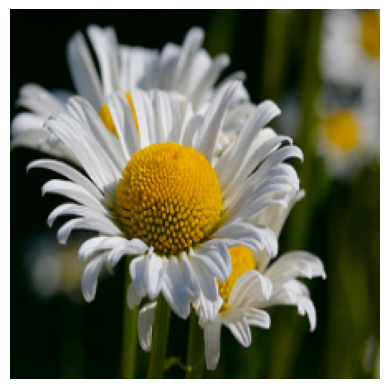

In [ ]:
# Visualization of image
def show_image(filename):
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    ## Matplotlib expects a numpy array
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_image(
    "gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg")

In [ ]:
# notice that the file name has the flower type in it. Let's look at a few tulips
tulips = tf.io.gfile.glob("gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/tulips/*.jpg")
f, ax = plt.subplots(1, 5, figsize=(15,15))
for idx, filename in enumerate(tulips[:5]):
  print(filename)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()));
  ax[idx].axis('off')

['gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/LICENSE.txt',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/README.txt',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/all_data.csv',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/daisy.zip',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/dandelion',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/dandelion.zip',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/dict.txt',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/eval_set.csv',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/flowers_200_csv.zip',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/flowers_200_folders.zip',
 'gs://practical-ml-vision-book-data/flowers_5_jpeg/flower_photos/flowers_200_presplit.zip',
 'gs://practical-